# Figure 8
A plot of the study regions for algorithm testing.

In [1]:
%matplotlib widget
# %load_ext autoreload
# %autoreload 2
from fig8code import *

In [2]:
# read in the shapefiles from IMBIE basins
ais_final = gpd.read_file('../data/shapefiles/ANT_basins_thresh1000.shp')
gris_final = gpd.read_file('../data/shapefiles/GRE_basins_thresh2000.shp')
coast = gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp')
shelf = gpd.read_file('../data/shapefiles/IceShelf_Antarctica_v02.shp')
ground = gpd.read_file('../data/shapefiles/GroundingLine_Antarctica_v02.shp')
ant_merged = gpd.read_file('../data/shapefiles/ANT_basins_merged.shp')
gre_merged = gpd.read_file('../data/shapefiles/GRE_basins_merged.shp')
amery = shelf[shelf.NAME == 'Amery']
bc = ais_final.loc[ais_final.Subregions=='B-C']
cw = gris_final.loc[gris_final.SUBREGION1=='CW']
bc_full = ant_merged.loc[ant_merged.Subregions=='B-C']
cw_full = gre_merged.loc[gre_merged.SUBREGION1=='CW']

# read in shapefiles made from ICESat-2 groud track KMLs (https://icesat-2.gsfc.nasa.gov/science/specs)
rgt_ant = gpd.read_file('../data/shapefiles/rgt_ant.shp').to_crs(ais_final.crs)[['Name', 'geometry']]
rgt_ant['geometry'] = shapely.wkb.loads(shapely.wkb.dumps(rgt_ant.geometry, output_dimension=2))
rgt_bc = gpd.clip(rgt_ant, bc).copy()
rgt_gre = gpd.read_file('../data/shapefiles/rgt_gre.shp').to_crs(gris_final.crs)[['Name', 'geometry']]
rgt_gre['geometry'] = shapely.wkb.loads(shapely.wkb.dumps(rgt_ant.geometry, output_dimension=2))
rgt_cw = gpd.clip(rgt_gre, cw).copy()

# read in the background imagery for maps
cwmodis = rio.open('data/CW-modis-2019-08-10T00_00_00Z.tif')
bcmodis = rio.open('data/BC-modis-2019-01-18T00_00_00Z.tif')

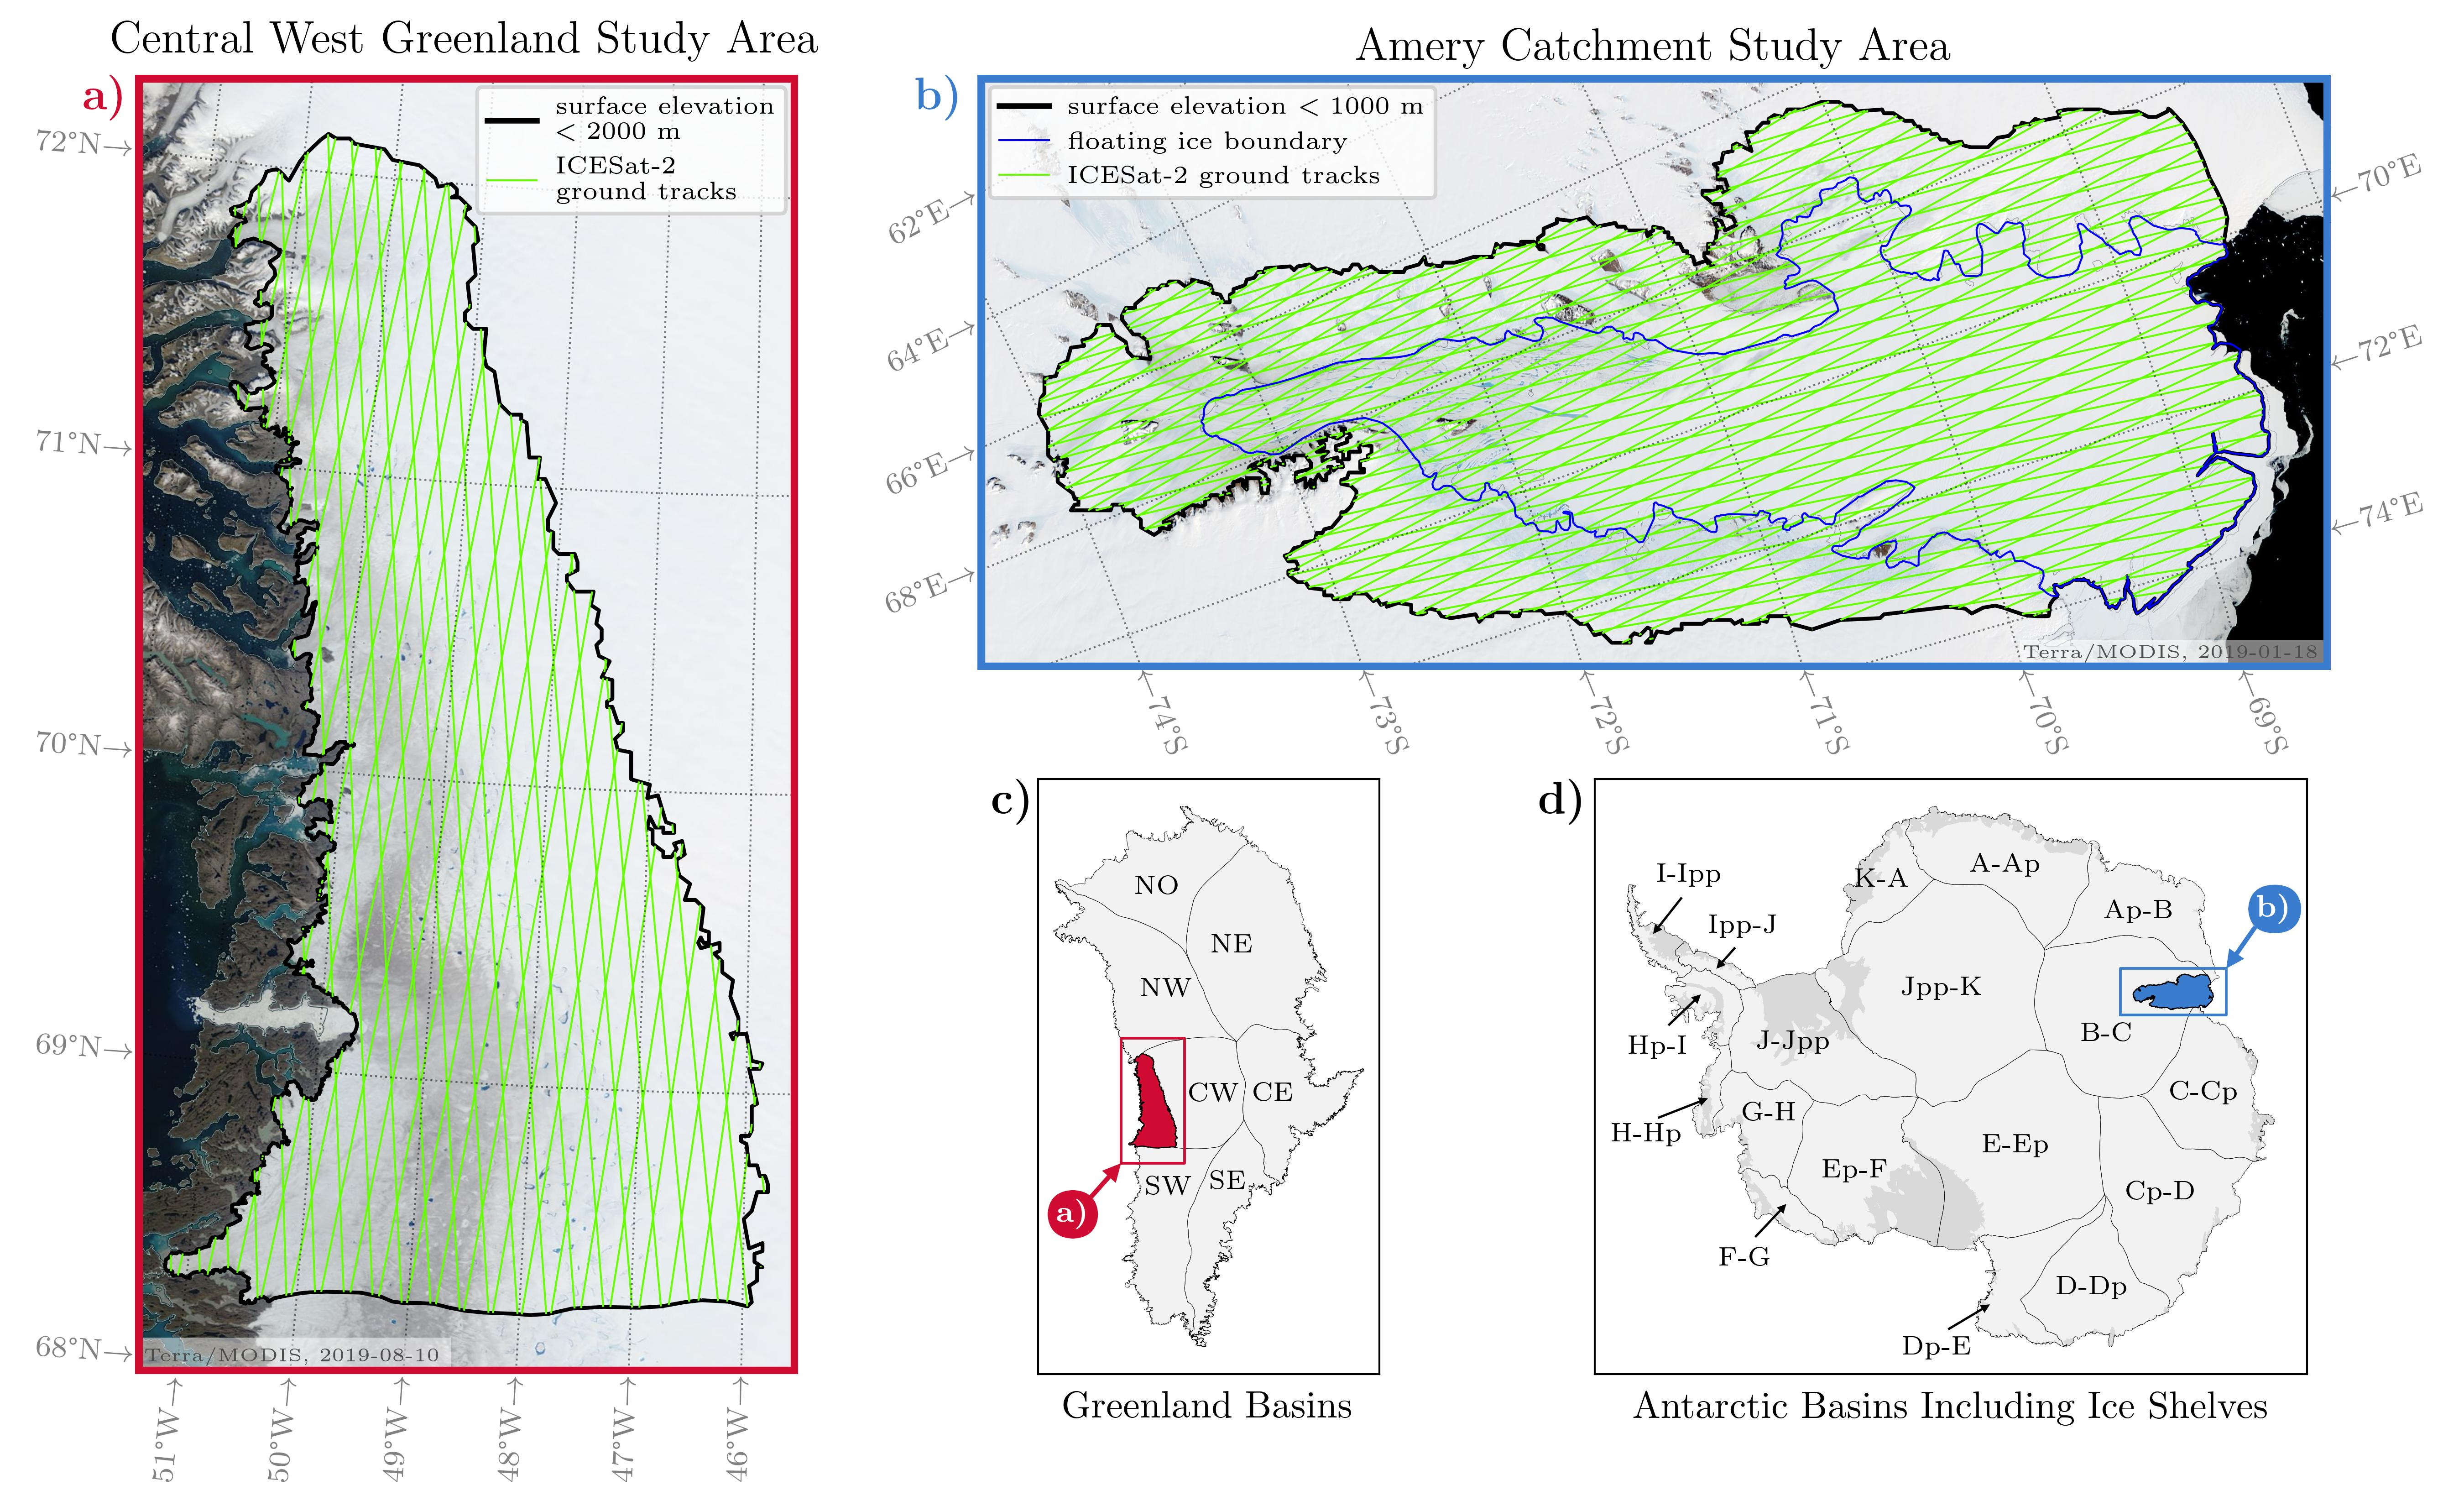

In [3]:
plotname = '../figures/fig08-study_regions.jpg'

# some figure settings
plt.close('all')
plt.rcParams.update({
    'font.size': 12,
    'text.usetex': True,
    'font.family': 'Optima'
})
is2green = '#65ff00'
colors = {
    'GrIS': '#D00C33', # Greenland flag
    'AIS': '#3A7DCE' # Antarctica, Graham Bartram Design
}
fsize_region_names = 7
arr_scale = 3
bbox_fac = 0.1
arr_p = dict(width=0.2*arr_scale, headwidth=0.8*arr_scale, headlength=0.8*arr_scale, color='k', lw=0)
arr_p_ = dict(width=0.2*arr_scale*2, headwidth=0.8*arr_scale*2, headlength=0.8*arr_scale*2, color='k', lw=0)

# create figure and axes 
fig = plt.figure(figsize=[9, 5.5], dpi=100)
gs = fig.add_gridspec(ncols=8, nrows=2)
ax1 = fig.add_subplot(gs[1, 5:])
ax2 = fig.add_subplot(gs[1, 3:5])
ax3 = fig.add_subplot(gs[0, 3:])
ax4 = fig.add_subplot(gs[:, :3])
axs = [ax4, ax3, ax2, ax1]

# plot all Antarctic basins with Amery Catchment study area highlighted 
ax = ax1
thisRegion = 'B-C'
ground.dissolve().plot(color=[0.95]*3, ax=ax, lw=0.5, alpha=1)
shelf.dissolve().plot(color=[0.85]*3, ax=ax, lw=0.5, alpha=1)
ant_merged.exterior.plot(color='k', ax=ax, lw=0.1)
bc.plot(color=colors['AIS'], ax=ax, alpha=1)
bc.exterior.plot(color='k', ax=ax, linewidth=0.3)
ax.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
[ax.spines[x].set_linewidth(0.5) for x in list(ax.spines)]
ax.text(0.5,-0.03,'Antarctic Basins Including Ice Shelves',fontsize=10, ha='center', va='top', transform=ax.transAxes)
for i in range(len(ant_merged)):
    x = ant_merged.iloc[i]
    region = x.Subregions
    thename = '%s' % region
    thiscolor = 'k'
    if region in region_locs.keys():
        locs = region_locs[region]
        xytext = [locs['x'], locs['y']]
        ax.annotate(text=thename, xy=xytext, ha='center',va='center',color=thiscolor,fontsize=fsize_region_names)
        if 'x_arr' in locs.keys():
            xyarr = [locs['x_arr'], locs['y_arr']]
            frac = 0.05
            xystart = np.array(xytext) + frac*(np.array(xyarr) - np.array(xytext)) 
            ax.annotate(' ', xy=xyarr, xytext=xystart,ha='center',va='center',color=thiscolor,fontsize=fsize_region_names,
                         arrowprops=arr_p,zorder=1000)
    else:
        ax.annotate(text=thename, xy=x.geometry.centroid.coords[0], ha='center',va='center',
                                           color=thiscolor,fontsize=fsize_region_names)

# plot all Greenland basins with Central West Study Region highlighted
ax = ax2
thisRegion = 'CW'
gre_merged.dissolve().plot(color=[0.95]*3, ax=ax, lw=0.5, alpha=1)
gre_merged.exterior.plot(color='k', ax=ax, lw=0.1)
cw.plot(color=colors['GrIS'], ax=ax, alpha=1)
cw.exterior.plot(color='k', ax=ax, linewidth=0.3)
ax.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
[ax.spines[x].set_linewidth(0.5) for x in list(ax.spines)]
ax.text(0.5,-0.03,'Greenland Basins',fontsize=10, ha='center', va='top', transform=ax.transAxes)
for i in range(len(gre_merged)):
    x = gre_merged.iloc[i]
    region = x.SUBREGION1
    thename = '%s' % region
    thiscolor = 'k'
    if region in region_locs.keys():
        locs = region_locs[region]
        xytext = [locs['x'], locs['y']]
        ax.annotate(text=thename, xy=xytext, ha='center',va='center',color=thiscolor,fontsize=fsize_region_names)
        if 'x_arr' in locs.keys():
            xyarr = [locs['x_arr'], locs['y_arr']]
            frac = 0.2
            xystart = np.array(xytext) + frac*(np.array(xyarr) - np.array(xytext)) 
            ax.annotate(' ', xy=xyarr, xytext=xystart,ha='center',va='center',color=thiscolor,fontsize=fsize_region_names,
                         arrowprops=arr_p,zorder=1000)
    else:
        ax.annotate(text=thename, xy=x.geometry.centroid.coords[0], ha='center',va='center',
                                           color=thiscolor,fontsize=fsize_region_names)

# plot Amery Catchment study area
ax = ax3
bc.exterior.plot(color='k', ax=ax, lw=1)
xl = ax.get_xlim()
yl = ax.get_ylim()
thresh, = ax.plot([0,1], [0,1], 'k-', label='surface elevation $<1000$ m')
rioplot.show(bcmodis, ax=ax)
rgt_bc.plot(color=is2green, ax=ax, lw=0.5)
gts, = ax.plot([0,1], [0,1], color=is2green, lw=0.5, label='ICESat-2 ground tracks')
amery.exterior.plot(color='b', ax=ax, lw=0.5)
groundline, =  ax.plot([0,1], [0,1], color='b', lw=0.5, label='floating ice boundary')
ax.axis('off')
bbox_bc = [[xl[i] for i in [0, 1, 1, 0, 0]], [yl[i] for i in [0, 0, 1, 1, 0]]]
dx = bbox_fac * (xl[1] - xl[0])
dy = bbox_fac * (yl[1] - yl[0])
xl_ = [xl[0] - dx, xl[1] + dx]
yl_ = [yl[0] - dy, yl[1] + dy]
bbox_bc_ext = [[xl_[i] for i in [0, 1, 1, 0, 0]], [yl_[i] for i in [0, 0, 1, 1, 0]]]
ax.plot(bbox_bc[0], bbox_bc[1], color=colors['AIS'], lw=4, zorder=100)
ax1.plot(bbox_bc_ext[0], bbox_bc_ext[1], color=colors['AIS'], lw=0.7, zorder=100)
arr_p_['color'] = colors['AIS']
ax1.annotate(r'\textbf{b)}', xy=[bbox_bc_ext[0][1],bbox_bc_ext[1][2]], xytext=(2744465.133,1408745.839),ha='center',va='center',
            color='white',fontsize=8, arrowprops=arr_p_,zorder=1000,
            bbox=dict(facecolor=colors['AIS'], alpha=1, boxstyle='round,pad=.3,rounding_size=0.9', lw=0))
ax.set_xlim(xl)
ax.set_ylim(yl)
ax.text(0.5,1.01,'Amery Catchment Study Area',fontsize=12, ha='center', va='bottom', transform=ax.transAxes)
ax.text(0.992,0.02, 'Terra/MODIS, 2019-01-18', transform=ax.transAxes, color=[0.3]*3, fontsize=5, ha='right',
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='square,pad=0.2', lw=0))

ax.legend(handles=[thresh, groundline, gts], loc='upper left', fontsize=6.5)
add_graticule(bc, ax, parallels_locs=['bottom'], meridians_locs=['left', 'right'])

# plot Central West Greenland study area
ax = ax4
cw.exterior.plot(color='k', ax=ax, lw=1)
xl = ax.get_xlim()
yl = ax.get_ylim()
thresh, = ax.plot([0,1], [0,1], 'k-', label='surface elevation\n$<2000$ m')
rioplot.show(cwmodis, ax=ax)
rgt_cw.plot(color=is2green, ax=ax, lw=0.5)
gts, = ax.plot([0,1], [0,1], color=is2green, lw=0.5, label='ICESat-2\nground tracks')
ax.axis('off')
bbox_cw = [[xl[i] for i in [0, 1, 1, 0, 0]], [yl[i] for i in [0, 0, 1, 1, 0]]]
dx = bbox_fac * (xl[1] - xl[0])
dy = bbox_fac * (yl[1] - yl[0])
xl_ = [xl[0] - dx, xl[1] + dx]
yl_ = [yl[0] - dy, yl[1] + dy]
bbox_cw_ext = [[xl_[i] for i in [0, 1, 1, 0, 0]], [yl_[i] for i in [0, 0, 1, 1, 0]]]
ax.plot(bbox_cw[0], bbox_cw[1], color=colors['GrIS'], lw=4, zorder=100)
ax2.plot(bbox_cw_ext[0], bbox_cw_ext[1], color=colors['GrIS'], lw=0.7, zorder=100)
arr_p_['color'] = colors['GrIS']
ax2.annotate(r'\textbf{a)}', xy=[bbox_cw_ext[0][0],bbox_cw_ext[1][0]], xytext=(-517443.449,-2690609.721),
             ha='center',va='center',color='white',fontsize=8, arrowprops=arr_p_,zorder=1000,
             bbox=dict(facecolor=colors['GrIS'], alpha=1, boxstyle='round,pad=.3,rounding_size=0.9', lw=0))
ax.set_xlim(xl)
ax.set_ylim(yl)
ax.text(0.5,1.01,'Central West Greenland Study Area',fontsize=12, ha='center', va='bottom', transform=ax.transAxes)
ax.text(0.015,0.01, 'Terra/MODIS, 2019-08-10', transform=ax.transAxes, color=[0.3]*3, fontsize=5, 
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='square,pad=0.5', lw=0))
ax.legend(handles=[thresh, gts], loc='upper right', fontsize=6.5)
add_graticule(cw, ax, parallels_locs=['left'], meridians_locs=['bottom'])

# add panel labels
for i,ax in enumerate(axs):
    col = list(colors.values())[i] if i<2 else 'k'
    ax.text(-0.01, 1, r'\textbf{%s)}' % chr(ord('a')+i), color=col, ha='right', va='top', transform=ax.transAxes)

fig.tight_layout(pad=0.5, h_pad=0.5, w_pad=0)

# save the figure and show plot
fig.savefig(plotname, dpi=600)
plt.close(fig)
display(Image(plotname))

## Get some track spacing stats

In [4]:
from shapely.geometry import Point, LineString
lat = 70
rgt_gre_asc = rgt_gre.loc[list(np.arange(1387)*2)].copy()
lons = np.arange(-180, 180, 0.01)
lats = np.ones_like(lons)*lat
df = pd.DataFrame({'lon': lons, 'lat': lats})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326").to_crs(rgt_gre_asc.crs)
parall = LineString(gdf.geometry.tolist())
rgt_int = rgt_gre_asc[rgt_gre_asc.intersects(parall)].copy()
pts = rgt_int.intersection(parall)
ptslatlon = pts.to_crs('EPSG:4326').get_coordinates()
ptsll = gpd.GeoDataFrame(ptslatlon, geometry=pts, crs=rgt_gre_asc.crs).sort_values(by='x').reset_index(names='idx')
spacing = ptsll.geometry.iloc[:-1].distance(ptsll.geometry.iloc[1:].reset_index()).mean()
print('The ICESat-2 track spacing is about %.1f km at %g degrees N/S.' % (spacing/1000, lat))

The ICESat-2 track spacing is about 9.9 km at 70 degrees N/S.


In [5]:
thelats = cw.to_crs('EPSG:4326').get_coordinates().y
rgt_gre_asc = rgt_gre.loc[list(np.arange(1387)*2)].copy()
lons = np.arange(-180, 180, 0.01)
for lat in [thelats.min(), thelats.max()]:
    lats = np.ones_like(lons)*lat
    df = pd.DataFrame({'lon': lons, 'lat': lats})
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326").to_crs(rgt_gre_asc.crs)
    parall = LineString(gdf.geometry.tolist())
    rgt_int = rgt_gre_asc[rgt_gre_asc.intersects(parall)].copy()
    pts = rgt_int.intersection(parall)
    ptslatlon = pts.to_crs('EPSG:4326').get_coordinates()
    ptsll = gpd.GeoDataFrame(ptslatlon, geometry=pts, crs=rgt_gre_asc.crs).sort_values(by='x').reset_index(names='idx')
    spacing = ptsll.geometry.iloc[:-1].distance(ptsll.geometry.iloc[1:].reset_index()).mean()
    print('The ICESat-2 track spacing is about %.1f km at %g degrees latitude.' % (spacing/1000, lat))

The ICESat-2 track spacing is about 10.8 km at 68.2083 degrees latitude.
The ICESat-2 track spacing is about 8.8 km at 72.1289 degrees latitude.


In [6]:
thelats = bc.to_crs('EPSG:4326').get_coordinates().y
rgt_ant_asc = rgt_ant.loc[list(np.arange(1387)*2)].copy()
lons = np.arange(-180, 180, 0.01)
for lat in [thelats.min(), thelats.max()]:
    lats = np.ones_like(lons)*lat
    df = pd.DataFrame({'lon': lons, 'lat': lats})
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326").to_crs(rgt_ant_asc.crs)
    parall = LineString(gdf.geometry.tolist())
    rgt_int = rgt_ant_asc[rgt_ant_asc.intersects(parall)].copy()
    pts = rgt_int.intersection(parall)
    ptslatlon = pts.to_crs('EPSG:4326').get_coordinates()
    ptsll = gpd.GeoDataFrame(ptslatlon, geometry=pts, crs=rgt_ant_asc.crs).sort_values(by='x').reset_index(names='idx')
    spacing = ptsll.geometry.iloc[:-1].distance(ptsll.geometry.iloc[1:].reset_index()).mean()
    print('The ICESat-2 track spacing is about %.1f km at %g degrees latitude.' % (spacing/1000, lat))

The ICESat-2 track spacing is about 7.9 km at -74.0518 degrees latitude.
The ICESat-2 track spacing is about 10.7 km at -68.4269 degrees latitude.
